In [153]:
%run 00_Dataset.ipynb

In [154]:
import os
import numpy as np
import matplotlib.pyplot as plt
import array
import math
import pandas as pd
#from astropy.cosmology import FlatLambdaCDM
import matplotlib
from matplotlib import gridspec

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [155]:
df_SNe = pd.read_excel('../data/quasar/QuasarDataset.xlsx')
df_SNe = pd.DataFrame(df_SNe)
df_SNe = df_SNe.sort_values('z', ascending=False)
df_SNe.shape[0]

2421

In [156]:
df_SNe.columns

Index(['Name', 'RAdeg', 'DEdeg', 'z', 'logFUV', 'e_logFUV', 'logFX', 'e_logFX',
       'Group', 'gammax', 'e_gammax', 'DM', 'e_DM'],
      dtype='object')

In [157]:
df_SNe.shape

(2421, 13)

In [158]:
df_SNe.min()

Name        000151.58+232857.6
RAdeg                  0.46495
DEdeg               -62.324972
z                        0.009
logFUV               -28.75888
e_logFUV                 0.002
logFX                -32.70632
e_logFX                0.00202
Group                        1
gammax                     1.3
e_gammax               0.00888
DM                   31.684266
e_DM                  0.069427
dtype: object

In [159]:
df_SNe.max()

Name        ULASJ1120+0641
RAdeg              359.993
DEdeg            75.310787
z                   7.5413
logFUV            -24.8822
e_logFUV               0.6
logFX              -28.385
e_logFX            0.31829
Group                    7
gammax                 4.1
e_gammax              2.15
DM               51.648979
e_DM              2.789577
dtype: object

In [160]:
l = np.linspace(0.009, 7.5413, 200)
df_SNe_binned = pd.DataFrame(columns=('Name', 'z', 'DM', 'e_DM'))
for i in range(0, len(l)-1):
    df_cur = df_SNe[(df_SNe['z'] >= l[i]) & (df_SNe['z'] < l[i+1])]
    sample_size = min(df_cur.shape[0], 3)
    if sample_size == 0: continue
    df_cur = df_cur.sample(sample_size, random_state=12)
    df_SNe_binned = pd.concat([df_SNe_binned, df_cur])  

z = df_SNe_binned['z'].astype(float).to_numpy()
mu = df_SNe_binned['DM'].astype(float).to_numpy()
mu_err = df_SNe_binned['e_DM'].astype(float).to_numpy()   

In [161]:
# df_SNe_binned=df_SNe
z = df_SNe_binned['z'].astype(float).to_numpy()
mu = df_SNe_binned['DM'].astype(float).to_numpy()
mu_err = df_SNe_binned['e_DM'].astype(float).to_numpy()  

In [176]:
z.size,mu.shape,mu_err.shape

(308, (308,), (308,))

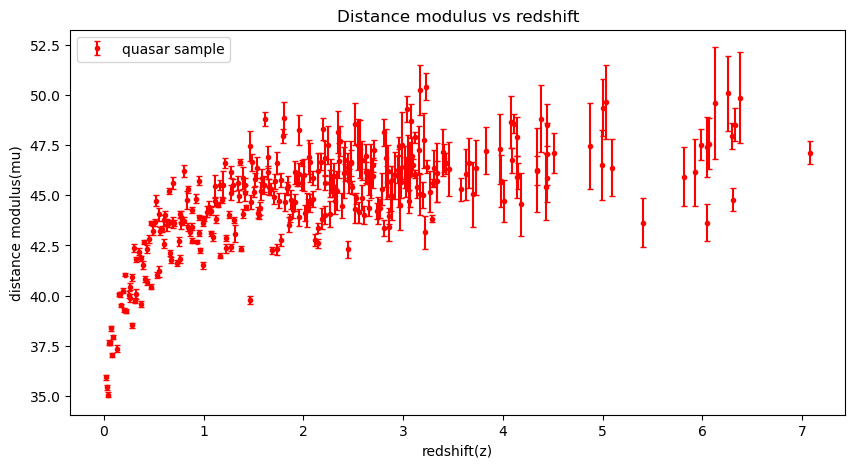

In [177]:
plt.figure(figsize=(10,5))
(_, caps, _) = plt.errorbar(z, mu, yerr=mu_err, fmt='.r',label=dataset+' sample',capsize=2);
for cap in caps:
    cap.set_markeredgewidth(1)
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('Distance modulus vs redshift')
plt.legend()
# plt.savefig(os.path.join(out_dir,'01_DistanceModulus_vs_Redshift_'+dataset+'.pdf'))

plt.show()

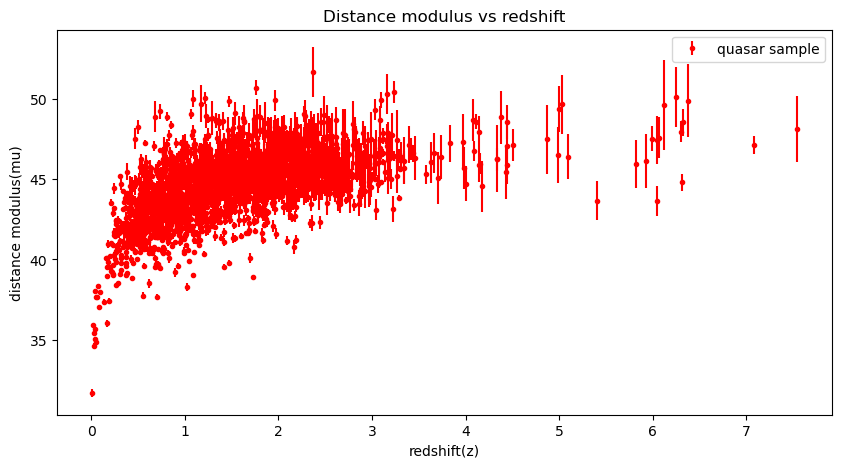

In [178]:
plt.figure(figsize=(10,5))
plt.errorbar(df_SNe['z'], df_SNe['DM'], yerr=df_SNe['e_DM'], fmt='.r',label=dataset+' sample');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('Distance modulus vs redshift')
plt.legend()
plt.savefig(os.path.join(out_dir,'01_DistanceModulus_vs_Redshift_'+dataset+'.pdf'))

plt.show()

In [179]:
df_SNe_binned

,Name,z,DM,e_DM,RAdeg,DEdeg,logFUV,e_logFUV,logFX,e_logFX,Group,gammax,e_gammax
2401,ARK120,0.0327,35.435843,0.116180,79.047588,-0.149827,-24.88220,0.005,-28.39300,0.01000,7.0,1.772,0.011
2408,NGC7469,0.0163,35.926231,0.119022,345.815095,8.873997,-25.01690,0.010,-28.55100,0.01000,7.0,1.690,0.060
2405,ESO141G055,0.0371,35.077846,0.133971,290.308902,-58.670307,-25.09850,0.007,-28.47300,0.01000,7.0,2.060,0.210
2409,MRK205,0.0708,38.370707,0.104561,185.434254,75.310787,-25.73410,0.006,-29.36700,0.01000,7.0,1.690,1.000
2406,IRAS09149-6206,0.0573,37.642038,0.094330,139.039125,-62.324972,-25.18890,0.003,-28.91800,0.01000,7.0,1.920,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,J0100+2802,6.3258,48.524659,0.842906,15.054200,28.040530,-27.28887,0.200,-31.87220,0.02500,3.0,2.180,0.300
41,SDSS1030+0524,6.3100,44.784496,0.554352,157.612920,5.415280,-28.38109,0.100,-31.98310,0.05533,3.0,2.100,0.200
40,SDSSJ010013.00+280225.9,6.3000,47.938096,0.643578,15.054250,28.048830,-27.16278,0.100,-31.70496,0.07352,3.0,2.400,0.200
2418,J0142-3327,6.3790,49.865759,2.276221,25.682200,-33.462640,-27.82531,0.500,-32.40864,0.15000,3.0,2.030,1.200


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
df_train, df_test = train_test_split(df_SNe_binned, test_size=0.2, random_state=123)

In [168]:
df_train.shape

(246, 13)

In [169]:
df_test.shape

(62, 13)

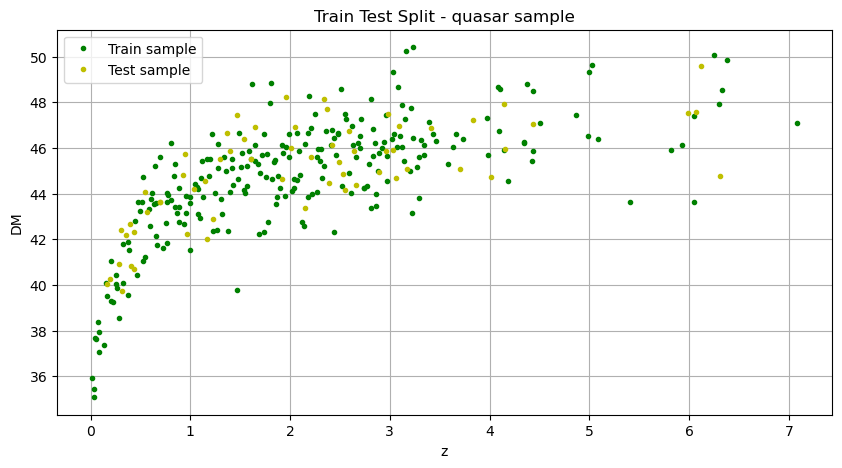

In [170]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,5))

ax1.plot(df_train['z'], df_train['DM'], '.g', label='Train sample')
ax1.plot(df_test['z'], df_test['DM'], '.y', label='Test sample')

ax1.set_ylabel('DM')
ax1.set_xlabel('z')
ax1.set_title('Train Test Split - '+dataset+' sample')
ax1.grid(True)
ax1.legend()

'''
ax2.plot(z_val, mu_val, '.y', label=dataset+' sample')
ax2.set_ylabel('mu')
ax2.set_xlabel('z')
ax2.set_title('Distance modulus vs redshift - Test data')
ax2.grid(True)
ax2.legend()
'''

plt.savefig(os.path.join(out_dir,'02_Train-Test-Split.pdf'))
plt.show()

In [171]:
# prepare sequential data
def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
    nrows = ((a.size-L)//S)+1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

In [172]:
if modelname == 'lstm':
    from sklearn.preprocessing import StandardScaler

    mu_scaler = StandardScaler()
    mu_scaler.fit(mu.reshape(-1,1))
    mu = mu_scaler.transform(mu.reshape(-1,1))

In [173]:
window_size = 4
train_stride = 4

z_strided = strided_app(z, window_size, train_stride)
mu_strided = strided_app(mu, window_size, train_stride)

z_strided = np.append(np.array([z[0], z[0], z[0], z[0]]).reshape(1,-1), z_strided, axis=0)
z_strided = np.append(np.array([z[0], z[0], z[0], z[1]]).reshape(1,-1), z_strided, axis=0)
z_strided = np.append(np.array([z[0], z[0], z[1], z[2]]).reshape(1,-1), z_strided, axis=0)

mu_strided = np.append(np.array([mu[0], mu[0], mu[0], mu[0]]).reshape(1,-1), mu_strided, axis=0)
mu_strided = np.append(np.array([mu[0], mu[0], mu[0], mu[1]]).reshape(1,-1), mu_strided, axis=0)
mu_strided = np.append(np.array([mu[0], mu[0], mu[1], mu[2]]).reshape(1,-1), mu_strided, axis=0)

z_train, z_val, mu_train, mu_val = train_test_split(z_strided, mu_strided, test_size=0.5, random_state=0)

In [174]:
# z_full = np.empty(shape=(0,4))
# mu_full = np.empty(shape=(0,4))
# for i in range(1000):
#     idx = rng.integers(low=0, high=z.shape[0], size=4, dtype=np.int64, endpoint=False)
#     idx = sorted(idx)
#     z_full = np.append(z_full, np.array([z[idx]]), axis=0)
#     mu_full = np.append(mu_full, np.array([mu[idx]]), axis=0)

In [175]:
z_full = np.expand_dims(z_strided, axis=-1)
mu_full = np.expand_dims(mu_strided, axis=-1)
z_train = np.expand_dims(z_train, axis=-1)
#z_test = np.expand_dims(z_test, axis=-1)
z_val = np.expand_dims(z_val, axis=-1)
mu_train = np.expand_dims(mu_train, axis=-1)
#mu_test = np.expand_dims(mu_test, axis=-1)
mu_val = np.expand_dims(mu_val, axis=-1)